# Time Series

- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

## Content
- Time series data structures
- Time-based indexing
- Visualizing time series data
- Seasonality
- Frequencies
- Resampling
- Rolling windows
- Trends

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

%matplotlib inline

!python -V
print(sys.executable)

Python 3.8.11
C:\Users\HAL9000\anaconda3\python.exe


---
# Data Set

The dataset: Open Power Systems Data [Link](https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv)

Daily time series of Open Power System Data (OPSD) for Germany, which has been rapidly expanding its renewable energy production in recent years. 
The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can download the data here.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- *Date* - Thedate(yyyy-mm-ddformat)
- *Consumption* - ElectricityconsumptioninGWh
- *Wind* - WindpowerproductioninGWh
- *Solar* - SolarpowerproductioninGWh
- *Wind+Solar* - SumofwindandsolarpowerproductioninGWh

---
# Creating a time series (data structure) DataFrame

**Todo:**
- check/adapt index
- check/adapt datetime
- add year/month/day columns for wrangling

In [2]:
# Open Power Systems Data
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.info  # not helpfull as it seems ?!

<bound method DataFrame.info of             Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]>

In [3]:
opsd_daily.shape

(4383, 5)

In [4]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

## Problem 1 - datetime
- Seems like Date is not recognized as DateTime Object!


In [6]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

## Problem 2 - index
- Wrong Index

In [7]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [8]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Solution while importing

In [9]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [10]:
df.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [12]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Add year/month/day

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['day'] = df.index.day
df.sample(5, random_state=0)

---
# Time-based indexing

**Remarks**:
-  `loc`
- also partial indexing


In [ ]:
df.head()

# time-based indexing
df.loc['2015-01-01':'2015-01-03']

# partial string indexing
df.loc['2010-02']

---
# Visualizing time series data

**Remarks**
- blub

## Yearly seasonality

In [ ]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 7)})

In [ ]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)

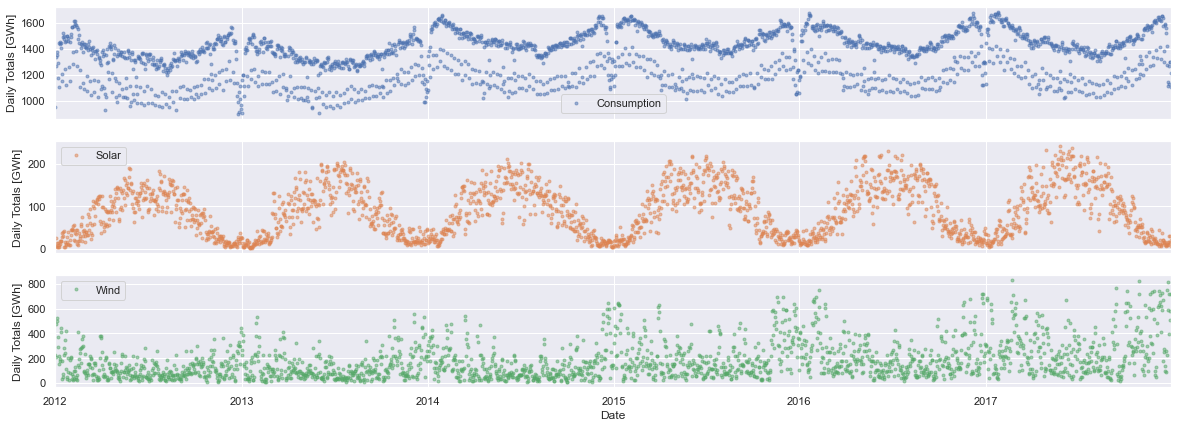

In [17]:
axes = df[cols_plot].loc['2012':'2018'].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals [GWh]')

### Observations
- Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
- Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
- Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
- Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
- There appears to be a strong increasing trend in wind power production over the years.


## Weekly seasonality 

Text(0, 0.5, 'Daily consumption [GWh]')

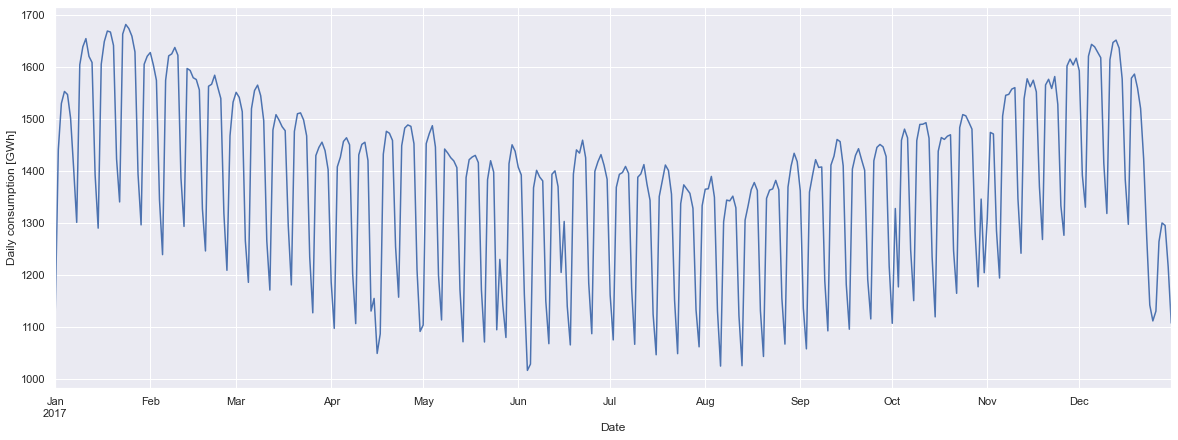

In [18]:
# df['Consumption'].loc['2015'].plot(linewidth=0.8)

# differnet version
ax = df.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily consumption [GWh]')

**Observation**

Drastic decrease in electricity consumption in early January and late December, during the holidays.



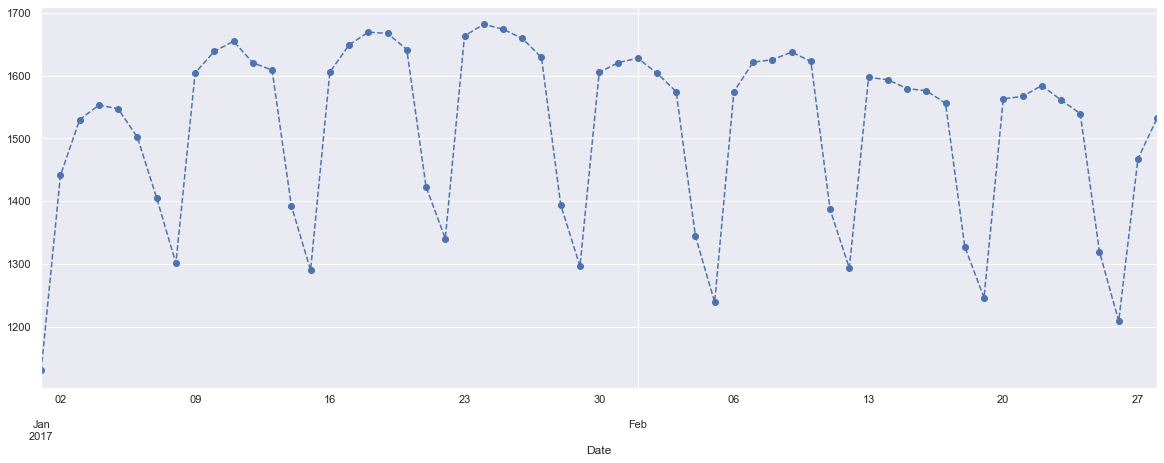

In [21]:
ax = df.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='--')
#ax.set(xlim=(0,5), ylim=(0,5), xticks=[0,2.5,5], yticks=[0,2.5,5])


Consumption is highest on weekdays and lowest on weekends.

## Customizing time series plots

Because date/time ticks are handled a bit differently in matplotlib.dates compared with the **DataFrame**’s `plot()` method, let’s create the *plot* directly in *matplotlib*. 

Then we use `mdates.WeekdayLocator()` and `mdates.MONDAY` to set the x-axis ticks to the first Monday of each week. 

We also use `mdates.DateFormatter()` to improve the formatting of the tick labels, using the format codes we saw earlier.

In [22]:
import matplotlib.dates as mdates

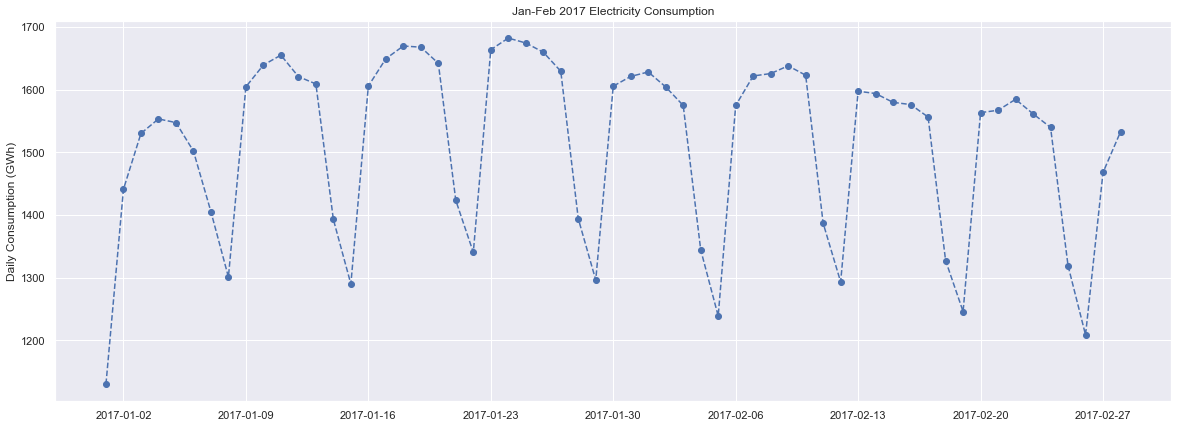

In [31]:
fig, ax = plt.subplots()
ax.plot(df.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='--')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

In [28]:
ax.plot()

[]